<a href="https://colab.research.google.com/github/thomhert/belajar-PyTorch/blob/master/02_Regresi_Linear_(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
import numpy as np
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt

# Soal

In [0]:
from sklearn.datasets import make_regression

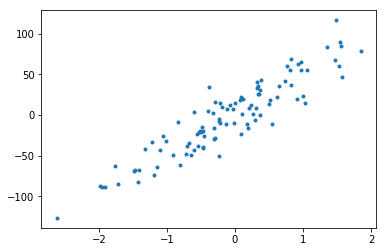

In [8]:
n_features = 1
n_samples = 100

X, y = make_regression(n_samples=n_samples,
                      n_features=n_features,
                      noise=20,
                      random_state=42)

fix, ax = plt.subplots()
ax.plot(X, y, ".")

# Solusi

In [0]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [10]:
X.shape

torch.Size([100, 1])

In [11]:
y.shape

torch.Size([100, 1])

In [0]:
class LinReg(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.beta = nn.Linear(input_dim, 1)
    
  def forward(self, X):
    return self.beta(X)

In [0]:
model = LinReg(n_features).to(DEVICE)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

X, y = X.to(DEVICE), y.to(DEVICE)

In [0]:
# Training
model.train()
optimizer.zero_grad()

y_ = model(X)
loss = loss_fn(y_, y)

loss.backward()
optimizer.step()

In [0]:
# Eval
model.eval()
with torch.no_grad():
  y_ = model(X)

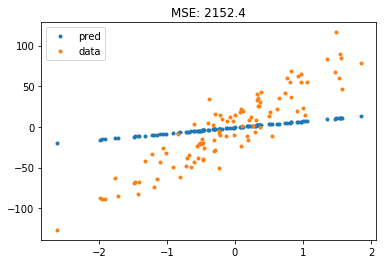

In [19]:
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();